#                                 NLP Project - Resume Screening

## Text Classification

In [2]:
# Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vedas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Importing Data:

df = pd.read_csv('UpdatedResumeDataSet.csv')

df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [4]:
df.shape

(962, 2)

                     Category  Number of Resumes
0              Java Developer                 84
1                     Testing                 70
2             DevOps Engineer                 55
3            Python Developer                 48
4               Web Designing                 45
5                          HR                 44
6                      Hadoop                 42
7                  Blockchain                 40
8               ETL Developer                 40
9          Operations Manager                 40
10               Data Science                 40
11                      Sales                 40
12        Mechanical Engineer                 40
13                       Arts                 36
14                   Database                 33
15     Electrical Engineering                 30
16         Health and fitness                 30
17                        PMO                 30
18           Business Analyst                 28
19           DotNet 

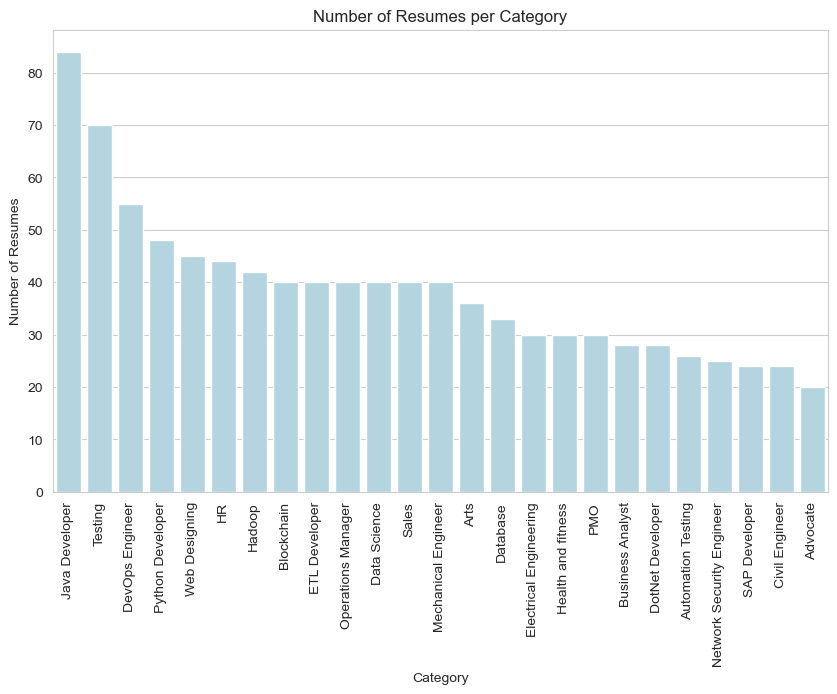

In [5]:
# Need to check how many categories are there and how many resumes are there in each category:

# Resume count for each category:
category_count = df['Category'].value_counts()

# Table Form:
cat_count_df = category_count.reset_index()
cat_count_df.columns = ['Category' , 'Number of Resumes']

print(cat_count_df)

total_cat = df['Category'].nunique()
print("\n\n\nTotal number of Categories: ", total_cat)

# Graph:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Number of Resumes', data=cat_count_df , color= 'lightblue')
plt.xticks(rotation=90)  
plt.title('Number of Resumes per Category')
plt.show()


### Data Cleaning

In [6]:
import re

# Creating a function to clean the resumes for further processing:

def clean_resume(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace special misformatted characters and correct known issues
    text = text.replace("naÃ¯ve", "naive").replace("â\x80¢", "-")
    
    # Remove URLs, numbers, and special characters (punctuation)
    text = re.sub(r'http\S+', '', text)  # Remove URLs if any
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-z\s]', ' ', text)  # Keep only lowercase letters and spaces
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [7]:
# Applying our clean function on our data set:

df['Resume'] = df['Resume'].apply(clean_resume)

In [8]:
df.head(10)

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv data...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
5,Data Science,skills c basics iot python matlab data science...
6,Data Science,skills python tableau data visualization r stu...
7,Data Science,education details b tech rayat and bahra insti...
8,Data Science,personal skills ability to quickly grasp techn...
9,Data Science,expertise data and quantitative analysis decis...


### Processing:

In [9]:
# Converting the categories into numerical values:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1 = df.copy()

le.fit(df['Category'])
df1['Category_num'] = le.transform(df['Category'])
df['Category'] = le.transform(df['Category'])

df.head(10)

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may to may b e uit rgpv data...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
5,6,skills c basics iot python matlab data science...
6,6,skills python tableau data visualization r stu...
7,6,education details b tech rayat and bahra insti...
8,6,personal skills ability to quickly grasp techn...
9,6,expertise data and quantitative analysis decis...


### Model Training:

In [10]:
# Splitting the data into test and train:

from sklearn.model_selection import train_test_split

X = df['Resume']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Logistic Regression:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# Create a pipeline
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], test_size=0.2, random_state=42)

# Define the pipeline with TF-IDF vectorizer and Logistic Regression
pipeline_lr_tuned = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Define the parameters grid for hyperparameter tuning
param_grid_lr = {
    'tfidf__max_features': [1000, 2000, 3000],  # Number of features to consider
    'tfidf__ngram_range': [(1, 1), (1, 2)],      # Uni-grams or Bi-grams
    'classifier__C': [0.1, 1, 10],               # Inverse of regularization strength
    'classifier__penalty': ['l2']                # Regularization penalty ('l2' for Ridge)
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_lr = GridSearchCV(pipeline_lr_tuned, param_grid_lr, cv=5, n_jobs=-1)

# Train the model (this will perform hyperparameter tuning as well)
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

# Predict on the test data using the best model
y_pred_lr_tuned = grid_search_lr.predict(X_test)

# Evaluate the model
print("Best Parameters for Logistic Regression:")
print(best_params_lr)
print("\nBest Score for Logistic Regression:", best_score_lr)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr_tuned))


Best Parameters for Logistic Regression:
{'classifier__C': 10, 'classifier__penalty': 'l2', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}

Best Score for Logistic Regression: 0.996103896103896

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00

### Linear SVC:

In [13]:
from sklearn.svm import LinearSVC

# Create a pipeline for LinearSVC
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LinearSVC(random_state=42))
])

# Train the model
pipeline_svc.fit(X_train, y_train)

# Predict on the test data
y_pred_svc = pipeline_svc.predict(X_test)

# Evaluate the model
print("LinearSVC Results:")
print(classification_report(y_test, y_pred_svc))

C:\Users\vedas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
        

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the pipeline with TF-IDF vectorizer and LinearSVC
pipeline_svc_tuned = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Define the parameters grid for hyperparameter tuning
param_grid_svc = {
    'tfidf__max_features': [1000, 2000, 3000],  # Number of features to consider
    'tfidf__ngram_range': [(1, 1), (1, 2)],      # Uni-grams or Bi-grams
    'classifier__C': [0.1, 1, 10]               # Regularization parameter
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_svc = GridSearchCV(pipeline_svc_tuned, param_grid_svc, cv=5, n_jobs=-1)

# Train the model (this will perform hyperparameter tuning as well)
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

# Predict on the test data using the best model
y_pred_svc_tuned = grid_search_svc.predict(X_test)

# Evaluate the model
print("Best Parameters for LinearSVC:")
print(best_params_svc)
print("\nBest Score for LinearSVC:", best_score_svc)
print("\nClassification Report for LinearSVC:")
print(classification_report(y_test, y_pred_svc_tuned))


Best Parameters for LinearSVC:
{'classifier__C': 0.1, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}

Best Score for LinearSVC: 0.996103896103896

Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00    

C:\Users\vedas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### KNN:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline for KNN
pipeline_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Train the model
pipeline_knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluate the model
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))


KNN Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17  

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with TF-IDF vectorizer and KNN classifier
pipeline_knn_tuned = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid to search over
param_grid_knn = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Perform grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(pipeline_knn_tuned, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:")
print(best_params_knn)
print("\nBest Score for KNN:", best_score_knn)

# Predict on the test data using the best estimator
y_pred_knn_tuned = grid_search_knn.best_estimator_.predict(X_test)

# Evaluate the model
print("KNN Results after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_knn_tuned))


Best Parameters for KNN:
{'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}

Best Score for KNN: 0.9935064935064937
KNN Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       0.71      1.00      0.83         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13

### Naive Bayes:

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

# Train the model
pipeline_nb.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = pipeline_nb.predict(X_test)

# Evaluate the model
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.00         8
      

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Define the pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
pipeline_nb_tuned = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Define the parameter grid to search over
param_grid_nb = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0]
}

# Perform grid search with 5-fold cross-validation
grid_search_nb = GridSearchCV(pipeline_nb_tuned, param_grid_nb, cv=5, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print("Best Parameters for Naive Bayes:")
print(best_params_nb)
print("\nBest Score for Naive Bayes:", best_score_nb)

# Predict on the test data using the best estimator
y_pred_nb_tuned = grid_search_nb.best_estimator_.predict(X_test)

# Evaluate the model
print("Naive Bayes Results after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_nb_tuned))


Best Parameters for Naive Bayes:
{'classifier__alpha': 0.1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}

Best Score for Naive Bayes: 0.9883116883116884
Naive Bayes Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00    

In [19]:
# Saving SVC Model:

import pickle

# Save the entire pipeline to disk
with open('svc_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_svc, file)


### Testing on Sample Resume:

In [20]:
Sample_resume = """

"""

In [21]:
import pickle

# Load the entire pipeline from disk
with open('svc_pipeline.pkl', 'rb') as file:
    loaded_pipeline_svc = pickle.load(file)



In [22]:
cleaned_resume = clean_resume(Sample_resume)

# Make the prediction
prediction = loaded_pipeline_svc.predict([cleaned_resume])

# Since `predict` returns an array, take the first element to use it in filtering
predicted_category_num = prediction[0]

# Filter the DataFrame
filtered_df = df1[df1['Category_num'] == predicted_category_num]

# Extract the category value
category_value = filtered_df['Category'].iloc[0]

print("Given Resume is for:", category_value)


Given Resume is for: Data Science
